#**Install Library**

In [205]:
!pip install imbalanced-learn
!pip install sastrawi
!pip install --upgrade google-api-python-client
!pip install langdetect
!pip install pandas

#Import Library

In [206]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import re
import string
import requests
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from io import StringIO

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Memuat Dataset

Melakukan read dataset dan menyimpannya di variabel data.

In [207]:
# Memuat dataset
reviews_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/sentimen_shopeepay/refs/heads/main/comment_shopeepay.csv")

Menampilkan informasi dari dataset seperti jumlah baris

In [208]:
# Menampilkan informasi dasar dataset
print("Jumlah baris dan kolom:")
print(reviews_df.shape)

Jumlah baris dan kolom:
(14999, 1)


Menampilkan informasi dari dataset seperti jumlah baris, kolom, dan tipe data.

In [209]:
# Menampilkan tipe data dari setiap kolom
print("\nInformasi kolom:")
print(reviews_df.info())


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                              

Menampilkan lima data teratas dari dataset.

In [210]:
# Menampilkan 5 baris pertama dataset
print("\n5 baris pertama dataset:")
print(reviews_df.head())


5 baris pertama dataset:
  Aplikasi yang sangat praktis, sangat sederhana dan nyaman, ketika kalian transaksi di aplikasi ini karena banyak promo yang menarik, secara keseluruhan untuk bayar tagihan atau topup sangat cepat. Selalu menggunakan aplikasi dompet digital pada platfrom yang memberikan manfaat bagi pemula, untuk pencairan paylater nya sangat mudah di acc, untuk tampilan dan fiturnya sangat bagus, sangat nyaman apabila transfer lewat aplikasi ini bebas biaya admin, untuk pelayanannya sangat ramah
0                                                                                                                                                                                                                                                                                                  QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup.
1 

Menampilkan tipe data dalam DataFrame

In [211]:
reviews_df.dtypes

,0
"Aplikasi yang sangat praktis, sangat sederhana dan nyaman, ketika kalian transaksi di aplikasi ini karena banyak promo yang menarik, secara keseluruhan untuk bayar tagihan atau topup sangat cepat. Selalu menggunakan aplikasi dompet digital pada platfrom yang memberikan manfaat bagi pemula, untuk pencairan paylater nya sangat mudah di acc, untuk tampilan dan fiturnya sangat bagus, sangat nyaman apabila transfer lewat aplikasi ini bebas biaya admin, untuk pelayanannya sangat ramah",object


Menampilkan DataFrame dan membuat new variabel pada dataframe

In [212]:
df = pd.read_csv("https://github.com/oktaagnes/ML_Analisis_Sentimen/blob/main/review_shopeepay.csv?raw=true", header=None, names=["Review"])
df

,Review
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup."
2,"Aplikasi yang bagus untuk pengiriman sesama dan antar bank, aplikasi yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih mudah dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk aplikasinya sangat stabil digunakan dan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya"
3,"Saya tidak menemukan esensi kegunaan lain dari aplikasi ini selain sebagai tempat setor awal untuk menabung di seabank saat hanya tersedia jaringan ritel alfa di daerah, selebihnya tidak berguna, pembayaran produk digital juga sudah disatukan dengan shopee, sebagai motode pembayaran shopee pun sudah tidak menarik karena biaya admin yang di kenakan sudah sama besar dengan metode lain di luar ekosistem shopee. Sebaiknya lebur saja dengan tabungan seperti ewallet si hijau."
4,"Aplikasi yang keren untuk pengiriman sesama dan antar bank, shope pay yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih gampang dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk appsnya sangat stabil dipakaidan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya deh"
...,...
11995,Untuk blanja baik klu untuk spinjam saya blum prnah d kasih smoga k dpanya lbih baik
11996,Mudah pembayaran nya gak perlu repot
11997,Tolong proses pinjamannya lebih mudah di ACC dan cepat
11998,sangat membantu sekali dalam segala keperluan terimakasih shopee


mengecek kembali dataFrame

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  12000 non-null  object
dtypes: object(1)
memory usage: 93.9+ KB


#Data preparation

#### Data Cleaning

Menghapus missing value pada kolom comment.

In [214]:
# Menghapus missing value pada kolom 'content'
clean_data = df.dropna(subset=['Review'])

# Menghapus data duplikat
clean_data = clean_data.drop_duplicates()

Menampilkan kembali info dari dataset setelah dilakukan cleaning.

In [215]:
# Menampilkan info dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11283 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  11283 non-null  object
dtypes: object(1)
memory usage: 176.3+ KB


Mendefinisikan fungsi-fungsi untuk preprocessing text.

* cleaningText: fungsi untuk menghapus mentions, hastag, RT, link, dan
numbers dari text.
* caseFfoldingText: fungsi untuk mengubah text menjadi lowercase.
* tokenizingText: fungsi untuk memecah text menjadi list tokens.
* filteringText: fungsi untuk menghapus stopwords dalam bahasa Indonesia ataupun Inggris.
* stemmingText: fungsi untuk mengubah text menjadi bentuk dasar. Namun pada proyek ini tidak akan digunakan karena proses nya yang lama.
* toSentence: fungsi untuk menggabungkan kembali text yang sebelumnya dipecah menjadi token.

####Data-processing text: membuat beberapa fungsi untuk memfilter teks

In [216]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

####Tokenization

Mendefinisikan fungsi untuk mengubah slangwords menjadi bentuk baku.

In [217]:
slangwords = {
    "@": "di","blanja":"belanja", "abis": "habis", "TF":"Transfer", "tf":"Transfer","masi": "masih", "bgt": "banget","bner":"bener","maks": "maksimal", "plisss": "tolong", "indo": "indonesia", "ad": "ada", "plis": "tolong", "pls": "tolong", "cod": "bayar di tempat",
    "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ak": "saya", "alay": "norak", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar",
    "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "ato": "atau", "au ah": "tidak mau tahu", "ay": "sayang", "ayank": "sayang", "bakalan": "akan", "bandes": "bantuan desa",
    "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bentar": "sebentar", "beresin": "membereskan", "bete": "bosan", "bg": "abang", "bgmn": "bagaimana",
    "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "boker": "buang air besar",
    "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "bw": "bawa", "bwt": "buat", "byk": "banyak",
    "cengengesan": "tertawa", "cepet": "cepat", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cpe": "capek", "d": "di", "dah": "deh", "dapet": "dapat", "dek": "adik", "demen": "suka",
    "dgn": "dengan", "dimintak": "diminta","disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "dongs": "dong", "dpt": "dapat", "dri": "dari",
    "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "emng": "memang", "endak": "tidak", "enggak": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gaptek": "gagap teknologi",
    "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gile": "gila", "gimana": "bagaimana", "gj": "tidak jelas", "gmana": "bagaimana", "goblok": "bodoh", "gpny": "tidak punya",
    "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "haha": "tertawa", "hlm": "halaman", "hny": "hanya", "hr": "hari", "hrus": "harus", "huff": "mengeluh", "ilang": "hilang", "iye": "iya", "ja": "saja", "jadiin": "jadi",
    "jdi": "jadi", "jga": "juga", "jgnkan": "jangankan", "njir": "anjing", "jln": "jalan", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kalo": "kalau", "kampret": "sialan", "kanwil": "kantor wilayah", "karna": "karena", "kbr": "kabar", "kdu": "harus",
     "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "ketrima": "diterima", "kl": "kalau", "klw": "kalau", "km": "kamu", "kmrn": "kemarin", "krm": "kirim", "ktmu": "ketemu", "ktr": "kantor", "kyk": "seperti",
    "la": "lah", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "lp": "lupa", "org": "orang", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "macem": "macam", "macih": "masih",
    "magabut": "makan gaji buta", "maksain": "memaksa", "mepet": "dekat sekali", "mgu": "minggu", "problem": "masalah", "tahi": "kotoran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "makasi": "terima kasih", "mnolak": "tolak",
    "trending": "trend", "min": "admin", "wkwkkw": "tertawa", "benarjujur": "jujur", "mgkin": "mungkin", "app": "aplikasi", "sat set": "cepat", "kls": "kelas", "gk": "tidak", "yg":"yang","ga":"tidak", "josssss":"bagus", "sya":"saya","stgh":"setengah","Mantab":"bagus","bner":"benar"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Mendefinisikan clean_df sebagai dataframe yang sudah bersih.

In [218]:
print(df.columns)

Index(['Review'], dtype='object')


In [219]:
#Menampilkan dataset yang belum bersih
df.head()

,Review
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup."
2,"Aplikasi yang bagus untuk pengiriman sesama dan antar bank, aplikasi yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih mudah dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk aplikasinya sangat stabil digunakan dan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya"
3,"Saya tidak menemukan esensi kegunaan lain dari aplikasi ini selain sebagai tempat setor awal untuk menabung di seabank saat hanya tersedia jaringan ritel alfa di daerah, selebihnya tidak berguna, pembayaran produk digital juga sudah disatukan dengan shopee, sebagai motode pembayaran shopee pun sudah tidak menarik karena biaya admin yang di kenakan sudah sama besar dengan metode lain di luar ekosistem shopee. Sebaiknya lebur saja dengan tabungan seperti ewallet si hijau."
4,"Aplikasi yang keren untuk pengiriman sesama dan antar bank, shope pay yang menghadirkan pengalaman betransaksi jadi lebih nyaman, tidak hanya itu aplikasi ini juga menyediakan topup atau bayar tagihan dengan praktis, hal yang suka dari apps ini adalah QRIS karena transaksi jadi lebih gampang dan cepat, mungkin hanya itu sedikit kekuranganya menurut saya pribadi, untuk appsnya sangat stabil dipakaidan ramah penyimpanan, untuk pelayanannya sangat ramah dan terpecaya deh"


Menerapkan preprocessing text pada dataset.

In [220]:
df['text_clean'] = df['Review'].apply(cleaningText)

df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

df['text_akhir'] = df['text_stopword'].apply(toSentence)

Menampilkan dataset setelah

In [221]:
df.head(2)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimited.....ini baru aplikasi yg saya ingin kan ...sangat membantu sekali dan mudah cara pakainya.....josssss banget.....ayo semua download aplikasinya ....sya sudah menggunakan hampir stgh tahun....tdk ada kendala sama sekali....tidak pernah maintenance...dan selalu succes proses TF nya dengan cepat kilat...tanpa delay...terima kasih shopee pay.....,Mantab bner nih aplikasinya TF ke semua bank gratisnya unlimitedini baru aplikasi yg saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya sya sudah menggunakan hampir stgh tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses TF nya dengan cepat kilattanpa delayterima kasih shopee pay,mantab bner nih aplikasinya tf ke semua bank gratisnya unlimitedini baru aplikasi yg saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya sya sudah menggunakan hampir stgh tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses tf nya dengan cepat kilattanpa delayterima kasih shopee pay,mantab benar nih aplikasinya Transfer ke semua bank gratisnya unlimitedini baru aplikasi yang saya ingin kan sangat membantu sekali dan mudah cara pakainyajosssss bangetayo semua download aplikasinya saya sudah menggunakan hampir setengah tahuntdk ada kendala sama sekalitidak pernah maintenancedan selalu succes proses Transfer nya dengan cepat kilattanpa delayterima kasih shopee pay,"[mantab, benar, nih, aplikasinya, Transfer, ke, semua, bank, gratisnya, unlimitedini, baru, aplikasi, yang, saya, ingin, kan, sangat, membantu, sekali, dan, mudah, cara, pakainyajosssss, bangetayo, semua, download, aplikasinya, saya, sudah, menggunakan, hampir, setengah, tahuntdk, ada, kendala, sama, sekalitidak, pernah, maintenancedan, selalu, succes, proses, Transfer, nya, dengan, cepat, kilattanpa, delayterima, kasih, shopee, pay]","[mantab, nih, aplikasinya, Transfer, bank, gratisnya, unlimitedini, aplikasi, membantu, mudah, pakainyajosssss, bangetayo, download, aplikasinya, tahuntdk, kendala, sekalitidak, maintenancedan, succes, proses, Transfer, cepat, kilattanpa, delayterima, kasih, shopee, pay]",mantab nih aplikasinya Transfer bank gratisnya unlimitedini aplikasi membantu mudah pakainyajosssss bangetayo download aplikasinya tahuntdk kendala sekalitidak maintenancedan succes proses Transfer cepat kilattanpa delayterima kasih shopee pay
1,"QRIS nya cepet banget. Tolong itu Bug yang penutup saldo diperbaiki, setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup.",QRIS nya cepet banget Tolong itu Bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,qris nya cepet banget tolong itu bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,qris nya cepat banget tolong itu bug yang penutup saldo diperbaiki setiap saldo nya disembunyikan begitu keluar dari aplikasi dan masuk lagi malah keliatan lagi saldo nya padahal udah ditutup,"[qris, nya, cepat, banget, tolong, itu, bug, yang, penutup, saldo, diperbaiki, setiap, saldo, nya, disembunyikan, begitu, keluar, dari, aplikasi, dan, masuk, lagi, malah, keliatan, lagi, saldo, nya, padahal, udah, ditutup]","[qris, cepat, banget, tolong, bug, penutup, saldo, diperbaiki, saldo, disembunyikan, aplikasi, masuk, keliatan, saldo, udah, ditutup]",qris cepat banget tolong bug penutup saldo diperbaiki saldo disembunyikan aplikasi masuk keliatan saldo udah ditutup


Mengunduh lexicon positive dan negative dari github.

In [222]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])


# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])

Mendefinisikan fungsi untuk menghitung polaritas sentimen.

In [223]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score <= -1):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [224]:
# # Menentukan label sentimen
# lexicon_positive = dict()

# response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/positive.csv')

# if response.status_code == 200:
#     reader = csv.reader(StringIO(response.text), delimiter=',')
#     for row in reader:
#         lexicon_positive[row[0]] = int(row[1])
# else:
#     print("Failed to fetch positive lexicon data")


# lexicon_negative = dict()

# response = requests.get('https://raw.githubusercontent.com/oktaagnes/ML_Analisis_Sentimen/refs/heads/main/data/negative.csv')

# if response.status_code == 200:
#     reader = csv.reader(StringIO(response.text), delimiter=',')
#     for row in reader:
#         lexicon_negative[row[0]] = int(row[1])
# else:
#     print("Failed to fetch negative lexicon data")


In [225]:
# def sentiment_analysis_lexicon_indonesia(text):
#     score = 0

#     for word in text:
#         if (word in lexicon_positive):
#             score = score + lexicon_positive[word]
#         if (word in lexicon_negative):
#             score = score + lexicon_negative[word]

#     polarity=''

#     if (score > 0):
#       polarity = 'positive'
#     elif (score < 0):
#       polarity = 'negative'
#     else:
#       polarity = 'neutral'

#     return score, polarity

#### Pelabelan: Hasil dari pelabelan

Menghitung polaritas.

In [226]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    5745
negative    4307
neutral     1948
Name: count, dtype: int64


##Visualisasi

Menampilkan distribusi polarity_score dengan histogram.

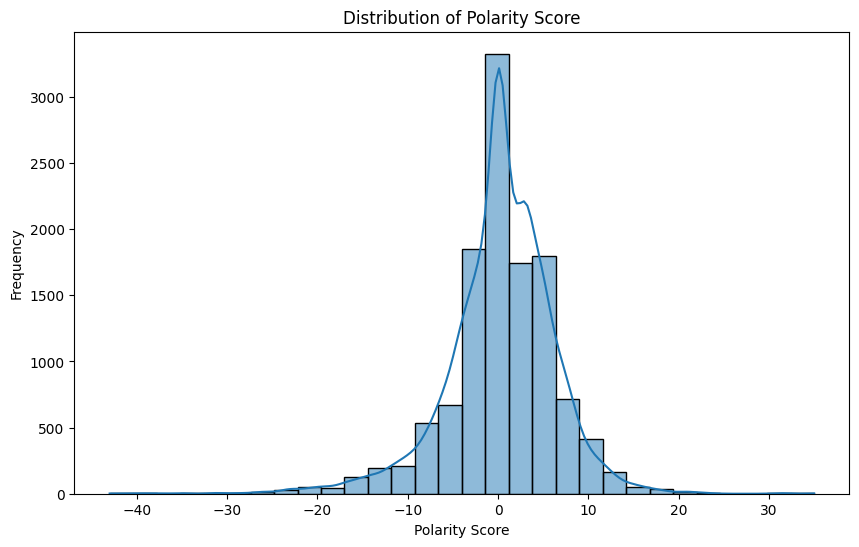

In [227]:
# Menampilkan distribusi polarity_score dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity_score'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

Menampilkan diagram lingkaran untuk memudahkan visualisasi pembagian dataset.

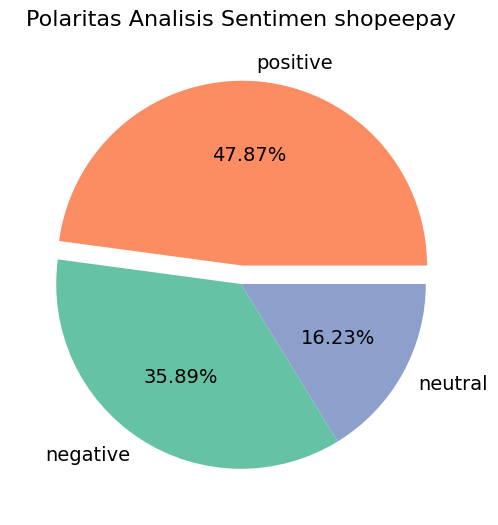

In [228]:
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = [0.1 if label == 'positive' else 0 for label in labels]
colors = ['#FC8D62', '#66C2A5', '#8DA0CB']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=sizes, labels=labels, autopct='%1.2f%%', explode=explode, textprops={'fontsize': 14}, colors=colors)

ax.set_title('Polaritas Analisis Sentimen shopeepay', fontsize=16, pad=20)
plt.show()

Membuat wordcloud dari dataset tanpa melihat label.

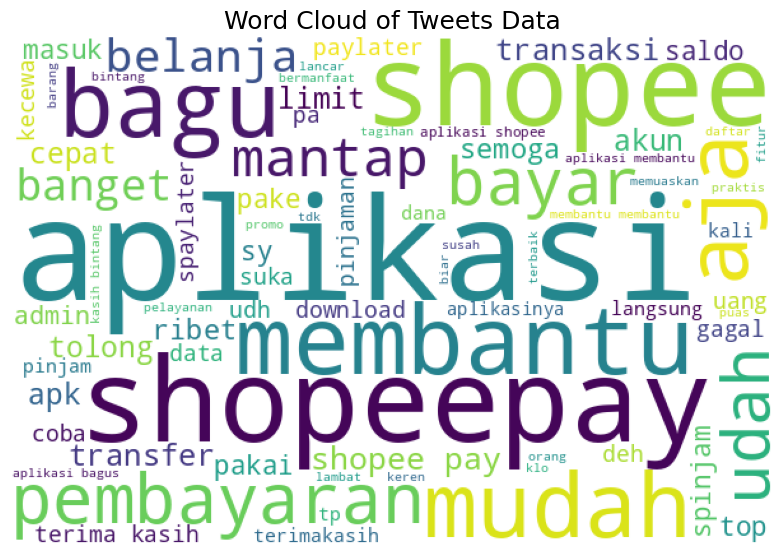

In [229]:
# Membuat wordcloud secara umum

list_words = ''

for tweet in df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

####Membuat review positif dan negatif untuk visulisasi

In [230]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_tweets = df[df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [231]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_tweets = df[df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [232]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = df[df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

####Memvisualisasi: wordcloud kata positif

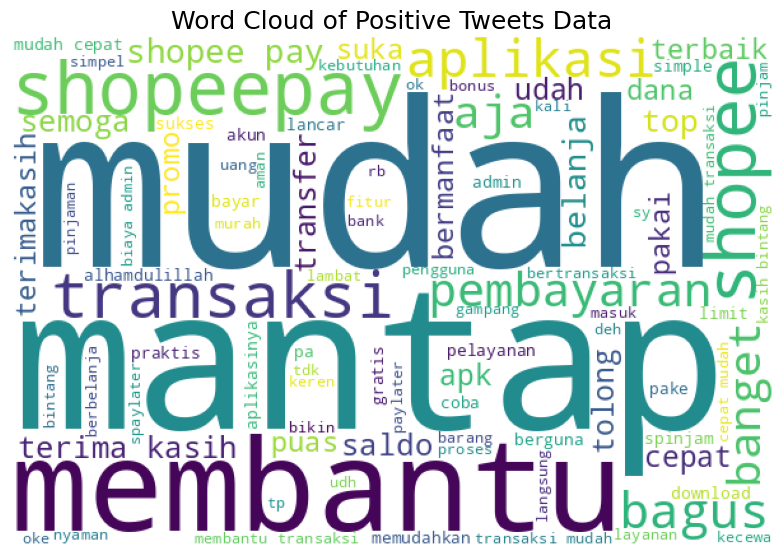

In [233]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

In [234]:
print(positive_tweets[['text_akhir', 'polarity_score']])

                                                                                                                                                                                                                                                                                                           text_akhir  \
1                                                                                     diskon semkin biaya top gratis semkain semkain hilang bonus belanja murah ongkir mkin mahal gebyar hadiah hilang tolong inovasi kebutuhan customer andai aja muncul pesaing menarik custumer hijrah terimakasih salam perubahan   
2                                                                                                                                         apps shopeepay mantap layanan terbaik zaman digital solutif modern nyaman bertransaksi apapun transfer gratis bank mudah keuangan finansial terimakasih shopeepay developer   
3                                                            

####Memvisualisasi: wordcloud kata negatif

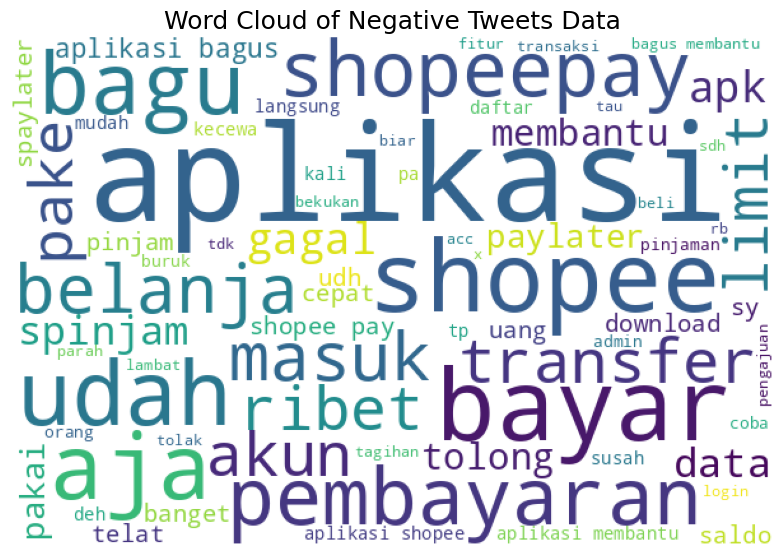

In [235]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

In [236]:
print(negative_tweets[['text_akhir', 'polarity_score']])

                                                                                                                                                                                                                                                                                                                                                                                                    text_akhir  \
1                                                                                                                                                                                                                                                                                         qris cepat banget tolong bug penutup saldo diperbaiki saldo disembunyikan aplikasi masuk keliatan saldo udah ditutup   
2                                                                                                                                                                                                   

####Memvisualisasi: wordcloud kata netral

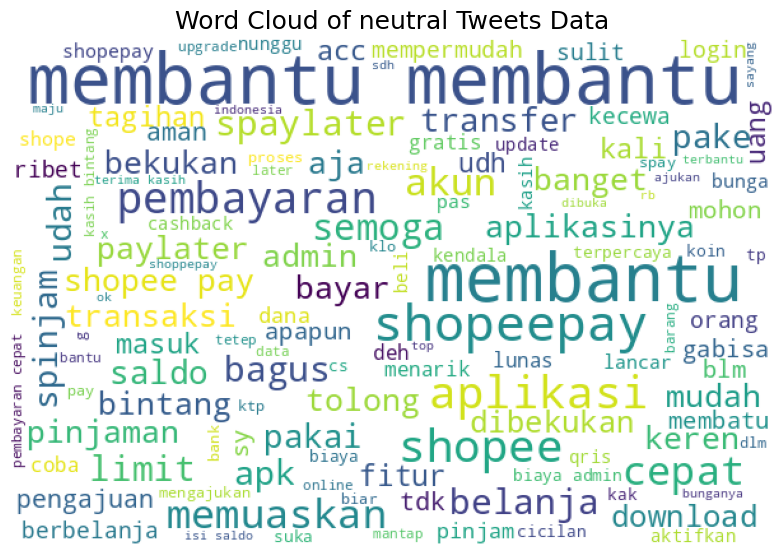

In [237]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

####Memvisualisasi: Distribusi kelas kata, kata yang sering muncul, dan distribusi panjang teks

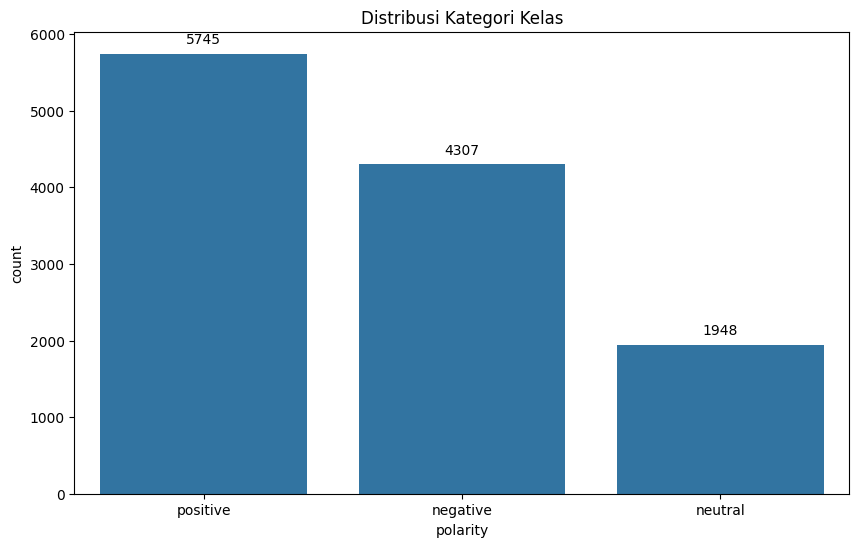

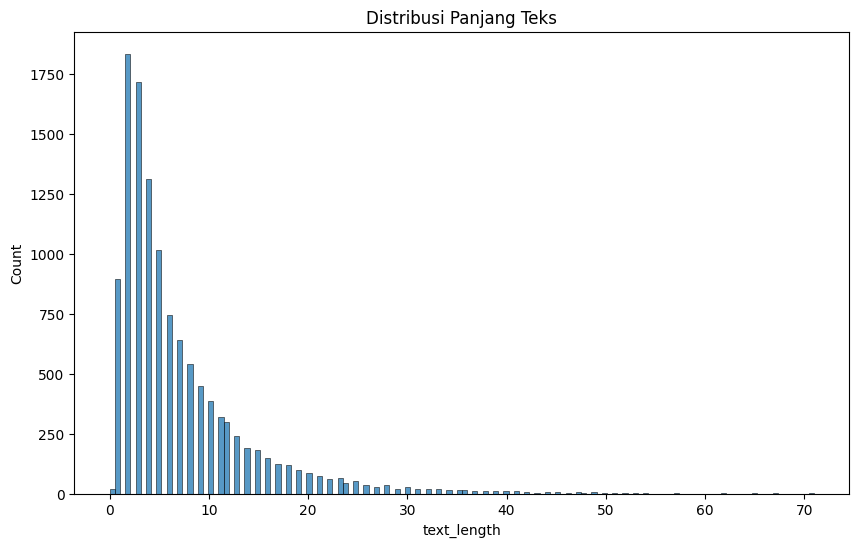

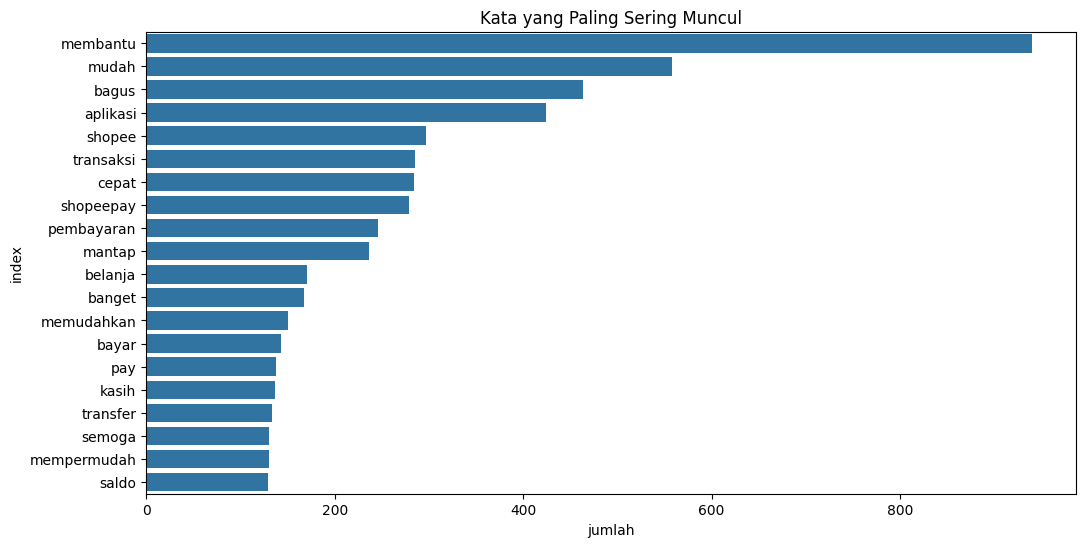

In [238]:
plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Distribusi Kategori Kelas')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

df['text_length'] = df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata yang Paling Sering Muncul')
plt.show()

# Data splittin

In [244]:
df_prep = df.copy()

# Modeling


Pembuatan model dengan melakukan tiga percobaan skema pelatihan yang berbeda dan dibedakan dengan variasi dari dua kombinasi seperti berikut:

* Model 1
- Algoritma Pelatihan: SVM
* Model 2
- Algoritma Pelatihan: Random Forest
* Model 3
- Algoritma Pelatihan: Deep LearningLSTM

###membagi dataframe mnejadi fitur dan label

Kolom text_akhir dijadikan sebagai fitur dan kolom polarity dijadikan sebagai target.

In [250]:
X = df_prep['text_akhir']
y = df_prep['polarity']

In [251]:
# Memisahkan data latih, validasi, dan uji
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

#Tokenisasi

In [252]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)

# Import to_categorical and then use it:
from tensorflow.keras.utils import to_categorical
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

print(f"Jumlah kelas: {num_classes}")

Jumlah kelas: 3


#Eksperimen dengan 3 Skema Pelatihan

####Skema 1: SVM dengan TF-IDF(80/20 split)

In [253]:
# Assuming X is your original feature data (text_akhir column in your case)
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df['text_akhir'], df['polarity'], test_size=0.3, random_state=42
)
# Preprocessing untuk model berbasis TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_raw)
X_test_tfidf = vectorizer.transform(X_test_raw)

# Terapkan SMOTE hanya pada data pelatihan
smote = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Distribusi label setelah SMOTE:", Counter(y_train_smote))

Distribusi label setelah SMOTE: Counter({'positive': 4061, 'negative': 4061, 'neutral': 4061})


In [254]:
# Eksperimen dengan 3 skema pelatihan (model)
# 1. Model SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf_smote, y_train_smote)
y_pred_svm = svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nEvaluasi Model SVM:")
print(f"Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm, target_names=['negatif', 'netral', 'positif']))


Evaluasi Model SVM:
Accuracy: 0.8811111111111111
              precision    recall  f1-score   support

     negatif       0.87      0.91      0.89      1297
      netral       0.76      0.79      0.78       619
     positif       0.93      0.89      0.91      1684

    accuracy                           0.88      3600
   macro avg       0.86      0.86      0.86      3600
weighted avg       0.88      0.88      0.88      3600



####Skema 2: Random Forest dengan Word2Vec (80/20 split)

In [255]:
  # 2. Model Random Forest
  rf = RandomForestClassifier(random_state=42)
  rf.fit(X_train_tfidf_smote, y_train_smote)
  y_pred_rf = rf.predict(X_test_tfidf)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  print("\nEvaluasi Model Random Forest:")
  print(f"Accuracy: {accuracy_rf}")
  print(classification_report(y_test, y_pred_rf, target_names=['negatif', 'netral', 'positif']))


Evaluasi Model Random Forest:
Accuracy: 0.86
              precision    recall  f1-score   support

     negatif       0.84      0.87      0.85      1297
      netral       0.79      0.82      0.81       619
     positif       0.90      0.87      0.88      1684

    accuracy                           0.86      3600
   macro avg       0.85      0.85      0.85      3600
weighted avg       0.86      0.86      0.86      3600



####Skema 3: Deep Learning LSTM (70/30 split)

In [256]:
# Preprocessing untuk model LSTM
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_raw)

X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Konversi label ke one-hot encoding
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

In [257]:
# 3. Model LSTM
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(128, return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.5),
    LSTM(64, kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

history = model_lstm.fit(
    X_train_pad, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(X_test_pad, y_test_cat),
    callbacks=callbacks
)

loss, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test_cat)
print("\nEvaluasi Model LSTM:")
print(f"Accuracy: {accuracy_lstm}")

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


132/132 ━━━━━━━━━━━━━━━━━━━━ 70s 487ms/step - accuracy: 0.5090 - loss: 2.7249 - val_accuracy: 0.6847 - val_loss: 0.8635 - learning_rate: 0.0010
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 60s 459ms/step - accuracy: 0.7433 - loss: 0.7405 - val_accuracy: 0.8197 - val_loss: 0.6206 - learning_rate: 0.0010
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 454ms/step - accuracy: 0.8573 - loss: 0.4836 - val_accuracy: 0.7750 - val_loss: 0.5839 - learning_rate: 0.0010
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 86s 482ms/step - accuracy: 0.9121 - loss: 0.3442 - val_accuracy: 0.8675 - val_loss: 0.4688 - learning_rate: 0.0010
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 451ms/step - accuracy: 0.9269 - loss: 0.2765 - val_accuracy: 0.8694 - val_loss: 0.4577 - learning_rate: 0.0010
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 60s 452ms/step - accuracy: 0.9459 - loss: 0.2412 - val_accuracy: 0.8828 - val_loss: 0.4670 - learning_rate: 0.0010
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 60s 454ms/step - accuracy: 0.9603 - loss:

#Evaluasi Model

melihat akurasi dari setiap model

In [258]:
results_df = pd.DataFrame({
    'Model': ['svm', 'rf ', 'model_lstm'],
    'Accuracy Train': [accuracy_svm, accuracy_rf, accuracy_lstm],
    'Accuracy Test': [accuracy_svm, accuracy_rf, accuracy_lstm]
})

accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

        Model  Accuracy Test
0         svm       0.881111
1         rf        0.860000
2  model_lstm       0.869444


In [259]:
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)
print(accuracy_test_sorted)

        Model  Accuracy Test
0         svm       0.881111
2  model_lstm       0.869444
1         rf        0.860000


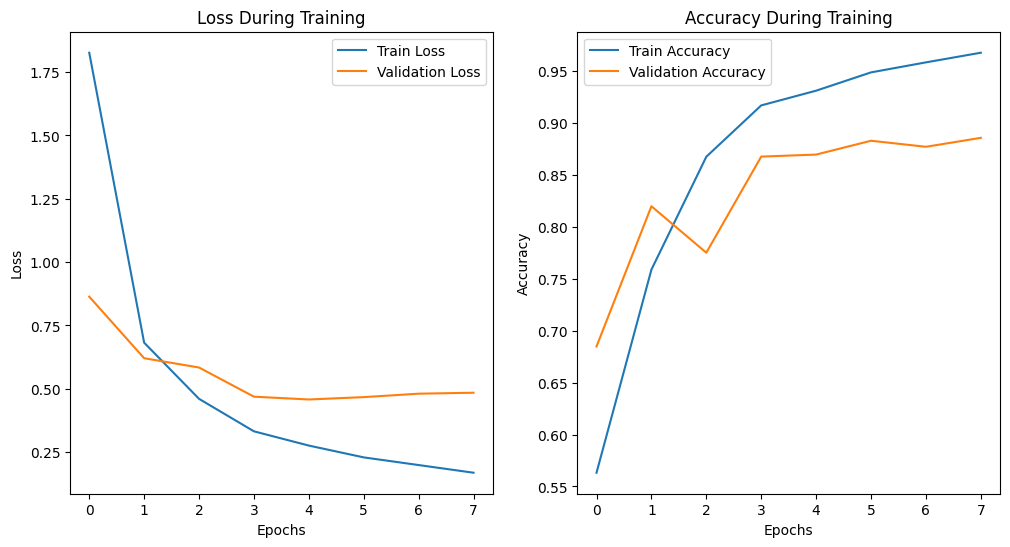

In [260]:
# Visualisasi hasil
import matplotlib.pyplot as plt

# Plot loss dan akurasi selama pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [261]:
# Bandingkan akurasi ketiga model
accuracies = {'SVM': accuracy_svm, 'Random Forest': accuracy_rf, 'LSTM': accuracy_lstm}

best_model_name = max(accuracies, key=accuracies.get)
print("\nModel terbaik berdasarkan akurasi:", best_model_name)


Model terbaik berdasarkan akurasi: SVM


#Predict

In [263]:
# Contoh data baru untuk prediksi
new_texts = [
    "melakukan transasksi sangat memuaskan menggunakan Shopeepay!",
    "Tidak bisa melakukan tansaksi dijam tertentu, mengecewakan!",
    "harga admin cukup bersaing, tapi masih bisa lebih baik lagi."
]

# Preprocessing untuk model berbasis TF-IDF (SVM & RF)
new_texts_tfidf = vectorizer.transform(new_texts)

# Prediksi menggunakan model SVM
y_pred_new_svm = svm.predict(new_texts_tfidf)
print("\nPrediksi SVM:")
for text, label in zip(new_texts, y_pred_new_svm):
    print(f"Text: {text}\nPredicted Label: {label}\n")

# Prediksi menggunakan model Random Forest
y_pred_new_rf = rf.predict(new_texts_tfidf)
print("\nPrediksi Random Forest:")
for text, label in zip(new_texts, y_pred_new_rf):
    print(f"Text: {text}\nPredicted Label: {label}\n")

# Preprocessing untuk model LSTM
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len)

# Prediksi menggunakan model LSTM
predictions_lstm = model_lstm.predict(new_padded_sequences)
y_pred_new_lstm = np.argmax(predictions_lstm, axis=1)

# Konversi prediksi LSTM ke label asli
label_mapping = {0: 'negatif', 1: 'netral', 2: 'positif'}
y_pred_new_lstm_labels = [label_mapping[label] for label in y_pred_new_lstm]

print("\nPrediksi LSTM:")
for text, label in zip(new_texts, y_pred_new_lstm_labels):
    print(f"Text: {text}\nPredicted Label: {label}\n")


Prediksi SVM:
Text: melakukan transasksi sangat memuaskan menggunakan Shopeepay!
Predicted Label: neutral

Text: Tidak bisa melakukan tansaksi dijam tertentu, mengecewakan!
Predicted Label: negative

Text: harga admin cukup bersaing, tapi masih bisa lebih baik lagi.
Predicted Label: positive


Prediksi Random Forest:
Text: melakukan transasksi sangat memuaskan menggunakan Shopeepay!
Predicted Label: neutral

Text: Tidak bisa melakukan tansaksi dijam tertentu, mengecewakan!
Predicted Label: negative

Text: harga admin cukup bersaing, tapi masih bisa lebih baik lagi.
Predicted Label: positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Prediksi LSTM:
Text: melakukan transasksi sangat memuaskan menggunakan Shopeepay!
Predicted Label: netral

Text: Tidak bisa melakukan tansaksi dijam tertentu, mengecewakan!
Predicted Label: negatif

Text: harga admin cukup bersaing, tapi masih bisa lebih baik lagi.
Predicted Label: positif



In [264]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2025.1.6.0.33.42
astunparse==1.6.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.31.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.9.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.1
cryptography==43